In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from cobl import initialize_diffusion_model
ckpt_path = "cobl/model_v5/cobl_added_params.ckpt"
model = initialize_diffusion_model("cobl/model_v5/config.yaml", ckpt_path)

/home/deanhazineh/anaconda3/envs/CoBL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Target Module: cobl.ddpm.LatentDiffusion
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 20 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, c

(-0.5, 511.5, 511.5, -0.5)

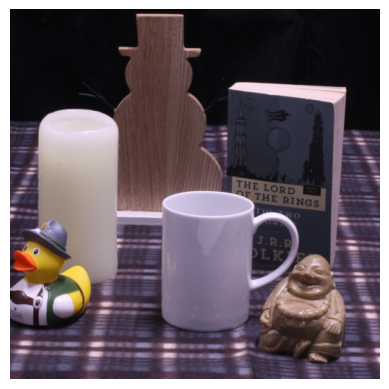

In [3]:
from cobl.Tabletop import Tabletop

test_dat = Tabletop(split="test")
scene = test_dat[0]["scene"]
fig, ax = plt.subplots(1,1)
ax.imshow(scene)
ax.axis('off')


In [4]:
from cobl import Guided_Layer_Sampler, split_layers

sampler = Guided_Layer_Sampler(model, n_steps=20)
torch.manual_seed(14)
torch.cuda.manual_seed(14)
x_start = torch.randn(
    (1, 28, 64, 64),
    dtype=torch.float32,
    device='cuda',
)
out, logger = sampler.sample(x_start=x_start, batch_size=1, cond=scene, use_guidance=True)

Using cache found in /home/deanhazineh/.cache/torch/hub/intel-isl_MiDaS_master
/home/deanhazineh/anaconda3/envs/CoBL/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Using cache found in /home/deanhazineh/.cache/torch/hub/intel-isl_MiDaS_master


Using Cond
Depth features added to cond
Using Text


  0%|          | 0/20 [00:00<?, ?it/s]/home/deanhazineh/anaconda3/envs/CoBL/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/deanhazineh/anaconda3/envs/CoBL/lib/python3.10/site-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/home/deanhazineh/ssd4tb_mounted/cobl/cobl/U2Net/u2net.py:27: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  src = F.upsample(src, size=tar.shape[2:], mode="bilinear")
/home/deanhazineh/ssd4tb_mounted/cobl/cobl/LDM/util

Decoding the final timestep


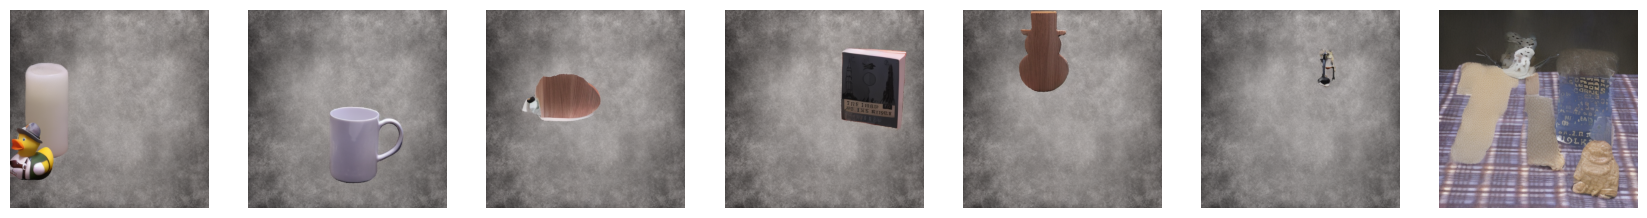

In [5]:
x0 = split_layers(out)
fig, ax = plt.subplots(1,7, figsize=(7*3, 3))
for i in range(7):
    ax[i].imshow(x0[0,0,i])
    ax[i].axis('off')

# Training

In [6]:
from cobl import initialize_training
trainer = initialize_training("cobl/model_v5/config.yaml", override_eager=False)
batch = next(iter(trainer.train_dataloader))
trainer.plot_drawn_samples(batch, "test.png")
trainer.fit()

Target Module: cobl.ddpm.LatentDiffusion
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 20 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, c

Loading Files: 100%|██████████| 2/2 [00:00<00:00, 163.17file/s]

None
Trainer Module: cobl.trainer.Trainer_with_plotting


model.T2I_Weights
model.input_blocks.1.0.alpha
model.input_blocks.1.0.conv3d.alpha
model.input_blocks.1.0.conv3d.block1.0.weight
model.input_blocks.1.0.conv3d.block1.0.bias
model.input_blocks.1.0.conv3d.block1.2.weight
model.input_blocks.1.0.conv3d.block1.2.bias
model.input_blocks.1.0.conv3d.block2.0.weight
model.input_blocks.1.0.conv3d.block2.0.bias
model.input_blocks.1.0.conv3d.block2.2.weight
model.input_blocks.1.0.conv3d.block2.2.bias
model.input_blocks.1.1.temporalAttention.alpha
model.input_blocks.1.1.temporalAttention.pos_enc.dummy
model.input_blocks.1.1.temporalAttention.q_proj.weight
model.input_blocks.1.1.temporalAttention.k_proj.weight
model.input_blocks.1.1.temporalAttention.v_proj.weight
model.input_blocks.1.1.temporalAttention.o_proj.weight
model.input_blocks.2.0.alpha
model.input_blocks.2.0.conv3d.alpha
model.input_blocks.2.0.conv3d.block1.0.weight
model.input_blocks.2.0.conv3d.block1.0.bias
model.input_blocks.2.0.conv3d.block1.2.weight
model.input_blocks.2.0.conv3d.bloc

Index 0, Time: 0: 100%|██████████| 50/50 [00:44<00:00,  1.12it/s]   
/home/deanhazineh/anaconda3/envs/CoBL/lib/python3.10/site-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Decoding the final timestep
torch.Size([1, 1, 21, 512, 512])
Gradient accumulation steps: 1
Learning Rate:  0.0001


KeyboardInterrupt: 

In [ ]:
# Reduce the checkpoint size by keeping only the added parameters
from cobl.load_utils import extract_missing_checkpoint_params
sd_ckpt_path = "cobl/LDM/SD2p1/v2-1_512-ema-pruned.ckpt"
cobl_ckpt_path = "cobl/model_v5/model_snapshots/ckpt_last.ckpt"
save_path = "cobl/model_v5/cobl_added_params.ckpt"
extract_missing_checkpoint_params(sd_ckpt_path, cobl_ckpt_path, save_path)


/home/deanhazineh/anaconda3/envs/CoBL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Saved missing parameters to: /home/deanhazineh/ssd4tb_mounted/cobl/cobl/model_v5/cobl_add_params.ckpt


{'cold_state',
 'cond_stage_model.adapter.body.0.resnets.0.block1.bias',
 'cond_stage_model.adapter.body.0.resnets.0.block1.weight',
 'cond_stage_model.adapter.body.0.resnets.0.block2.bias',
 'cond_stage_model.adapter.body.0.resnets.0.block2.weight',
 'cond_stage_model.adapter.body.0.resnets.1.block1.bias',
 'cond_stage_model.adapter.body.0.resnets.1.block1.weight',
 'cond_stage_model.adapter.body.0.resnets.1.block2.bias',
 'cond_stage_model.adapter.body.0.resnets.1.block2.weight',
 'cond_stage_model.adapter.body.1.in_conv.bias',
 'cond_stage_model.adapter.body.1.in_conv.weight',
 'cond_stage_model.adapter.body.1.resnets.0.block1.bias',
 'cond_stage_model.adapter.body.1.resnets.0.block1.weight',
 'cond_stage_model.adapter.body.1.resnets.0.block2.bias',
 'cond_stage_model.adapter.body.1.resnets.0.block2.weight',
 'cond_stage_model.adapter.body.1.resnets.1.block1.bias',
 'cond_stage_model.adapter.body.1.resnets.1.block1.weight',
 'cond_stage_model.adapter.body.1.resnets.1.block2.bias',
 